 <span style="font-family: MS Gothic; font-size:3.0em;color:indigo">Projeto Modulação AM</span> 


 <span style="font-family: MS Gothic; font-size:1.5em;color:green">Gabriella Cukier</span> 


## Definindo Imports e funções importantes

In [207]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
from suaBibSignal import *
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import soundfile   as sf
import matplotlib as mpl


In [208]:
def calcFFT(signal, fs):
    # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
    #y  = np.append(signal, np.zeros(len(signal)*fs))
    N  = len(signal)
    T  = 1/fs
    xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
    yf = fft(signal)
    return(xf, fftshift(yf))


In [209]:
def LPF(signal, cutoff_hz, fs):
        from scipy import signal as sg
        #####################
        # Filtro
        #####################
        # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 60.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return( sg.lfilter(taps, 1.0, signal))

In [210]:
def normalize(audio):
    m = max(abs(audio))
    return [a/m for a in audio]

In [211]:
def plotFFT(signal, fs, title):
        x,y = calcFFT(signal, fs)
        plt.figure()
        plt.grid(True)
        plt.title(title)
        plt.plot(x, np.abs(y), color="green")


In [212]:
def plotSignal(audio, title):
    t=np.linspace(0,4,len(audio))
    plt.plot(t,audio, color="indigo")
    plt.grid(True)
    plt.title(title)
    mpl.style.use("seaborn")

In [213]:
def generateSin(freq, time, fs):
    n = time*fs #numero de pontos
    x = np.linspace(0.0, time, n)  # eixo do tempo
    s = np.sin(freq*x*2*np.pi)
    return (x, s)


## Propriedades dos sinais 

In [214]:
fs  = 44100   # pontos por segundo (frequência de amostragem)
#A   = 1.5   # Amplitude
#F   = 1     # Hz
T   = 4     # Tempo em que o seno será gerado
#t   = np.linspace(-T/2,T/2,T*fs)
n=T*fs


## 1. Leitura do arquivo audio

In [215]:
sd.default.samplerate = fs
sd.default.channels = 1
audio, samplerate = sf.read('camFis.wav')
yAudio = audio[:,1]
yAudio=yAudio[0:n]
samplesAudio = len(yAudio)


In [216]:
sd.play(audio)
sd.wait()


## 2. Normalizando o audio

In [217]:
normalized = normalize(yAudio)


## 3. Reproduzindo o audio para verificação

In [218]:
sd.play(normalized, fs)
sd.wait()
print("Os audios são semelhantes")

Os audios são semelhantes


## 4. Filtrando as altas frequências

In [219]:
yFiltrado = LPF(normalized, 4000, fs)

##  5. Reproduzindo o sinal filtrado

In [220]:
sd.play(yFiltrado)
sd.wait()

## 6. Modulando sinal em AM

In [221]:
freq = 14000
portadora = generateSin(freq, 4, fs)
sinalPortadora = portadora[1]
sinalModulado = sinalPortadora*yFiltrado

## 7. Reproduzindo o sinal modulado

In [222]:
sd.play(sinalModulado)
sd.wait()

## 8.a. Gráficos do sinal original

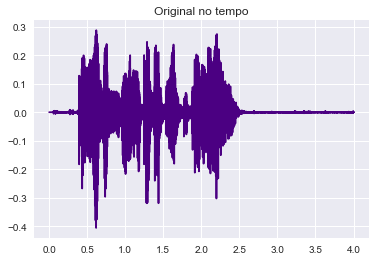

In [223]:
plotSignal(yAudio, 'Original no tempo')

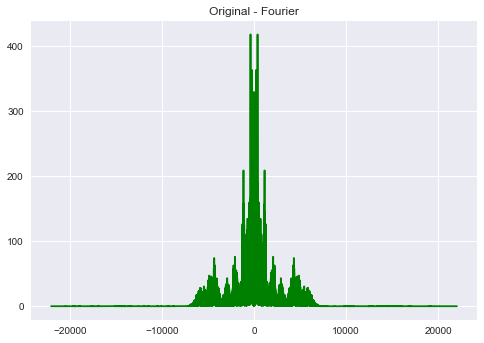

In [224]:
plotFFT(yAudio, fs, 'Original - Fourier')

## 8.b. Gráficos do sinal normalizado

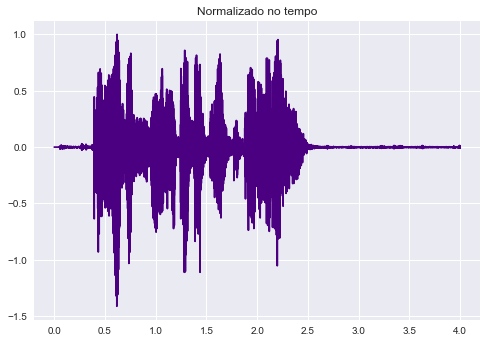

In [225]:
plotSignal(normalized, 'Normalizado no tempo')

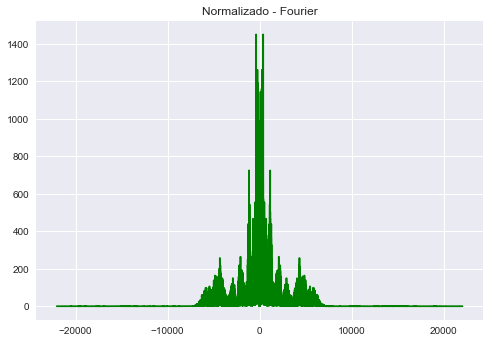

In [226]:
plotFFT(normalized, fs, "Normalizado - Fourier")

## 8.c. Gráficos do sinal filtrado

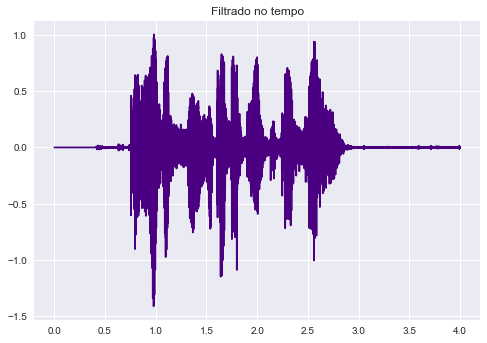

In [227]:
plotSignal(yFiltrado, 'Filtrado no tempo')

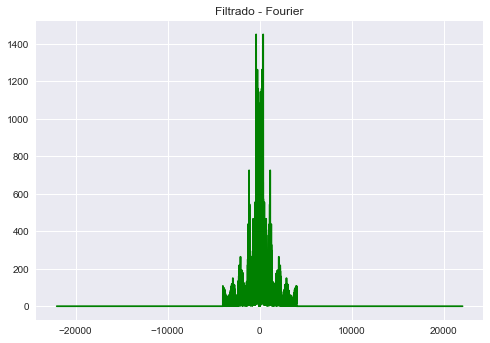

In [228]:
plotFFT(yFiltrado, fs, "Filtrado - Fourier")

## 8.d. Gráficos do sinal modulado

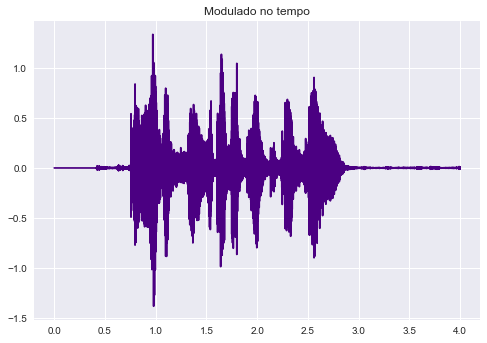

In [229]:
plotSignal(sinalModulado, 'Modulado no tempo')

(5000, 20000)

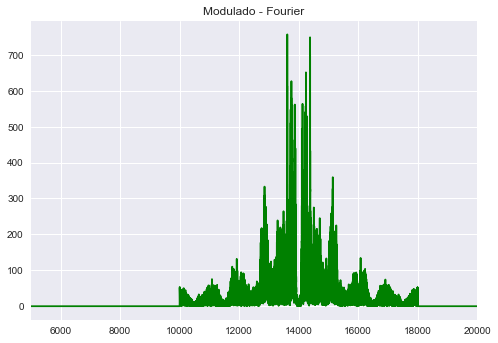

In [230]:
plotFFT(sinalModulado, fs, "Modulado - Fourier")
plt.xlim(5000,20000)

## 9. Demodulando o sinal

In [231]:
sinalDemodulado = sinalPortadora*sinalModulado

## 10. Reproduzindo o sinal demodulado

In [232]:
sd.play(sinalDemodulado)
sd.wait()

## 11. Gráficos do sinal demodulado

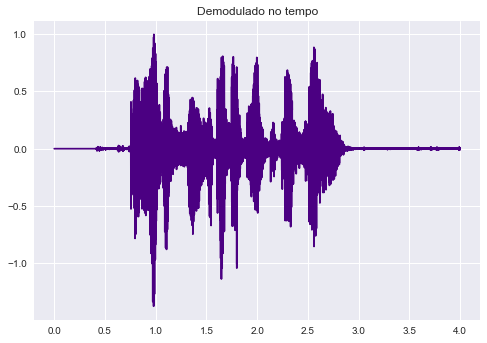

In [233]:
plotSignal(sinalDemodulado, 'Demodulado no tempo')

(-10000, 10000)

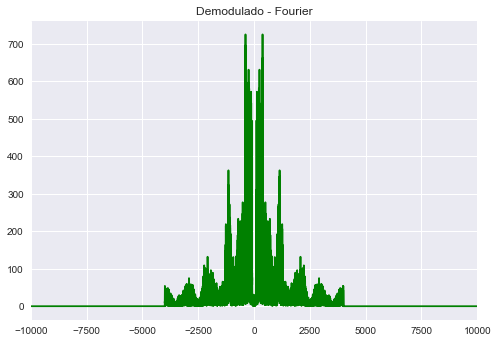

In [235]:
plotFFT(sinalDemodulado, fs, "Demodulado - Fourier")
plt.xlim(-10000,10000)